## Estadistica Aplicada 

Sesion 13 - 26 septiembre 

Ana Sofia Saucedo Garcia

Grupo 42

In [1]:
# Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [8]:
## especializadas 

from statsmodels.tsa.seasonal import seasonal_decompose

## tamaño de graficas (largo,alto)
plt.rcParams['figure.figsize']=(10,6)

In [6]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [7]:
pasajeros.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


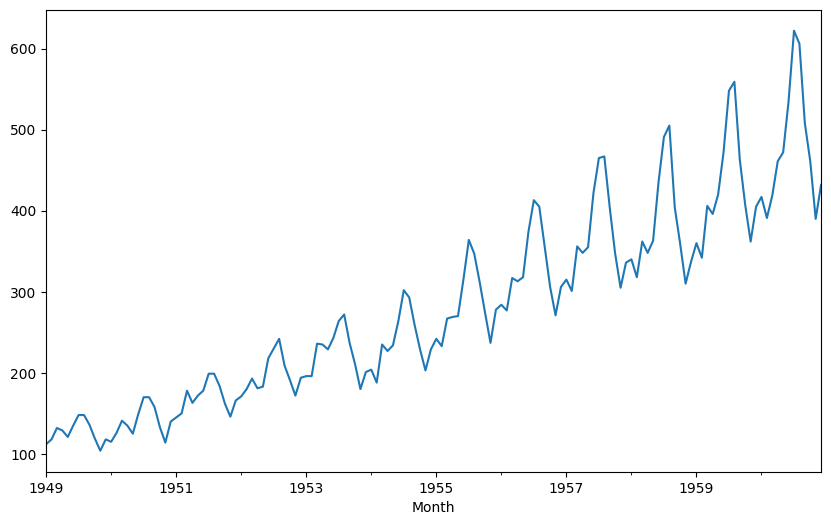

In [9]:
pasajeros['Thousands of Passengers'].plot();

La serie tiene componente estacional y tiene tendencia creciente 

vamos a tener 3 componentes :

1. Tendencia-ciclo 
2. Estacional
3. Irregular

In [11]:
ets1= seasonal_decompose(pasajeros['Thousands of Passengers'],model='mult')

# puede ser multiplicativa (mult) o aditiva (add) segun como se vea la grafica 

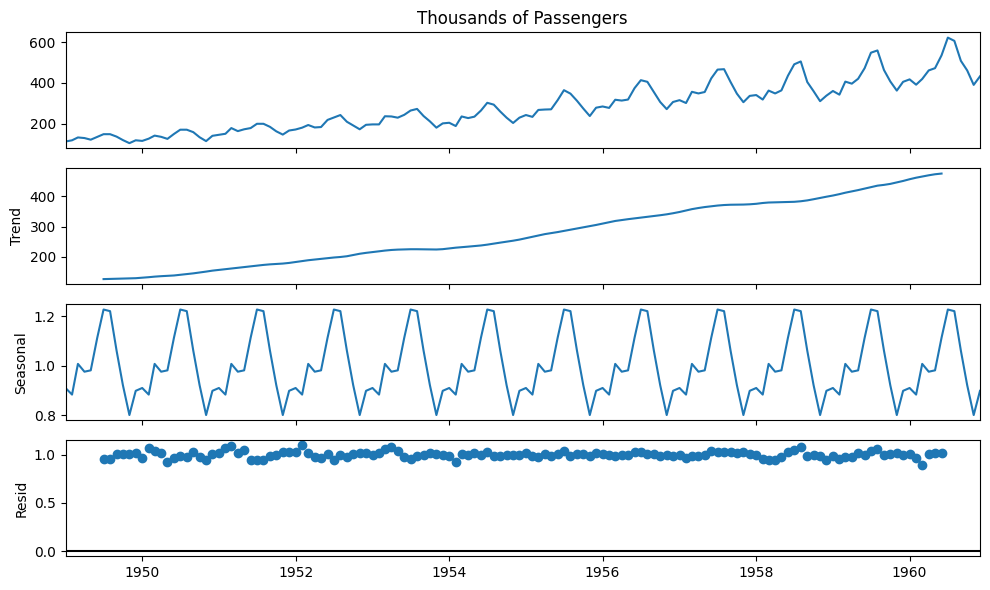

In [13]:
ets1.plot();

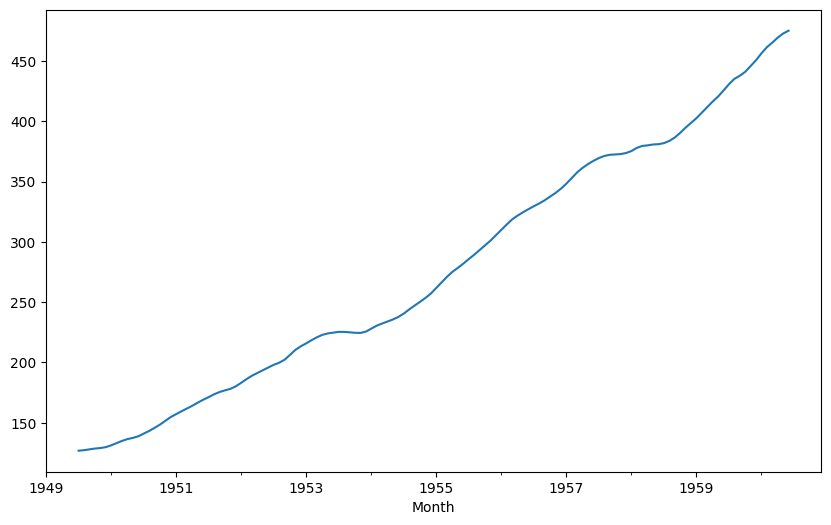

In [17]:
# Tendencia ciclo 
ets1.trend.plot();

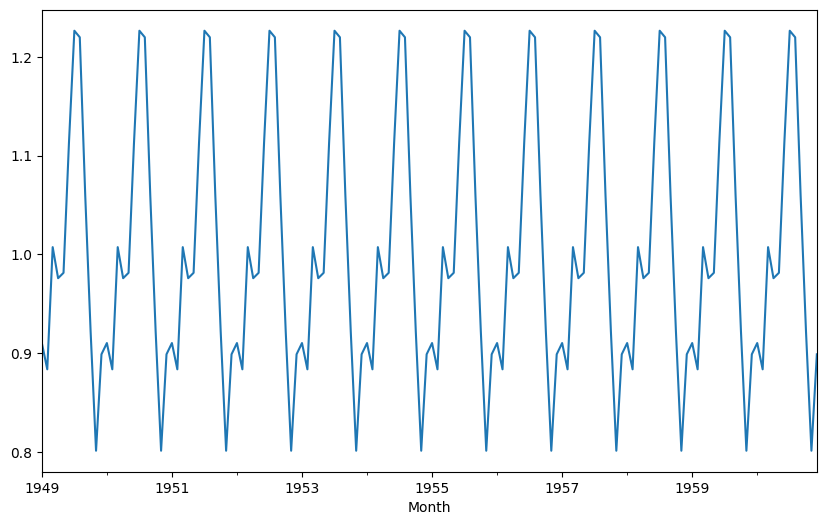

In [16]:
# estacional
ets1.seasonal.plot();

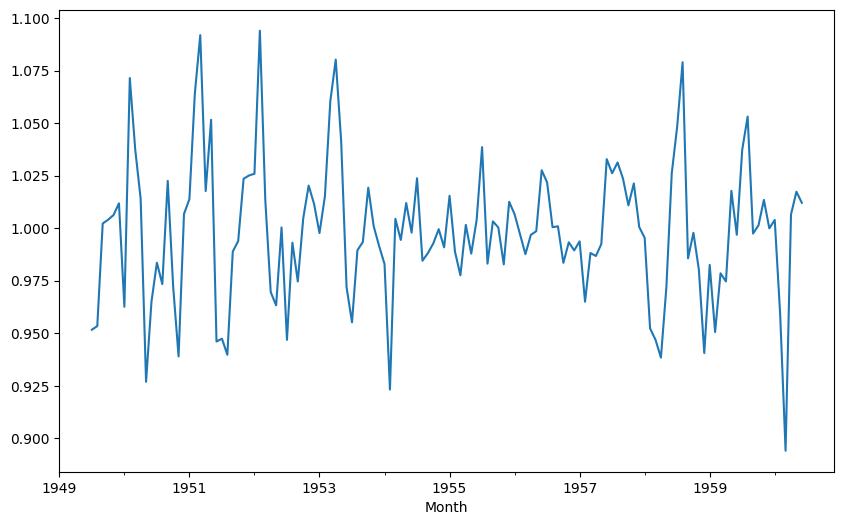

In [18]:
# irregular 

ets1.resid.plot();

In [24]:
# estacional
ets1.seasonal.head(12)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Name: seasonal, dtype: float64

In [21]:
## desestacionalizar 
## quitarle componente estacional 

pasajeros['desestecionalizada']=pasajeros['Thousands of Passengers']/ ets1.seasonal

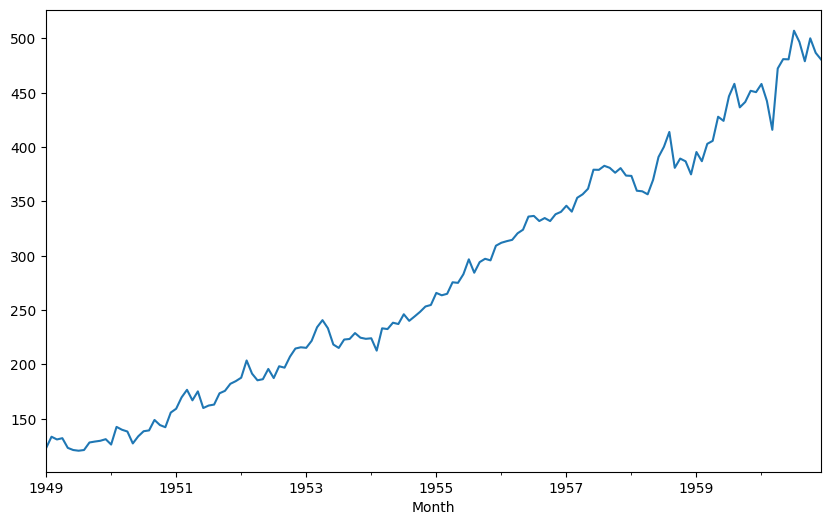

In [23]:
pasajeros['desestecionalizada'].plot();

In [25]:
pasajeros['tendencia-ciclo']=ets1.trend

In [26]:
pasajeros=pasajeros[['Thousands of Passengers','tendencia-ciclo']]

In [27]:
pasajeros.head()

,Thousands of Passengers,tendencia-ciclo
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


In [28]:
pasajeros.to_excel('pasajeros.xlsx')

In [29]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import yfinance as yf

In [31]:
# descargar el precio de la acción de Walmart de México 
## Ticker (nombre en bolsa)

walmex= yf.download('WALMEX.MX',
                    start='2017-01-01',
                    end='2022-12-31',
                    progress=False)

In [32]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,37.099998,37.500000,37.049999,37.049999,31.779730,842718
2017-01-03,37.540001,37.840000,37.450001,37.680000,32.320099,10727225
2017-01-04,37.820000,37.849998,37.500000,37.750000,32.380154,20056831
2017-01-05,37.750000,37.849998,36.950001,37.410000,32.088524,34325666
2017-01-06,37.520000,37.750000,36.439999,36.529999,31.333679,51254600


In [33]:
walmex=walmex['Adj Close']

In [ ]:
walmex.to_excel('walmex.xlsx')